**Categorical Encoding:**
Categorical data, also known as nominal or ordinal data, is a type of data that consists of values that fall into distinct categories or groups. Unlike numerical data, which represents measurable quantities, categorical data represents qualitative or descriptive characteristics. It is crucial to understand categorical data when working with machine learning models, as most models require numerical inputs.

**What is Categorical Data?**

When we collect data, we often encounter different types of variables. One such type is categorical variables. Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number.

There are two types of categorical data -

• Ordinal Data

• Nominal Data

**Examples of Categorical Data**

Categorical variables can be represented as strings or labels and have a finite number of possible values. Here are a few common examples:

The city where a person lives (e.g., Delhi, Mumbai, Ahmedabad, Bangalore)

The department a person works in (e.g., Finance, Human Resources, IT, Production)

The highest degree a person has (e.g., High School, Diploma, Bachelor’s, Master’s, PhD)

The grades of a student (e.g., A+, A, B+, B, B-)

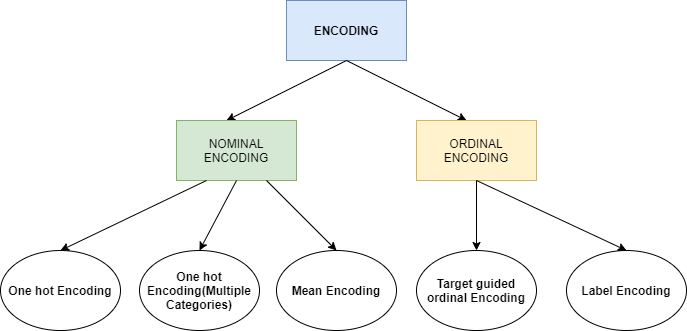

**One-hot Encoding:**  
One-hot encoding is a technique in machine learning that turns categorical data, like colors (red, green, blue), into numerical data for machines to understand. It creates new binary columns for each category, with a 1 marking the presence of that category and 0s elsewhere. This allows machine learning algorithms to process the information in categorical data without misinterpreting any order between the categories.

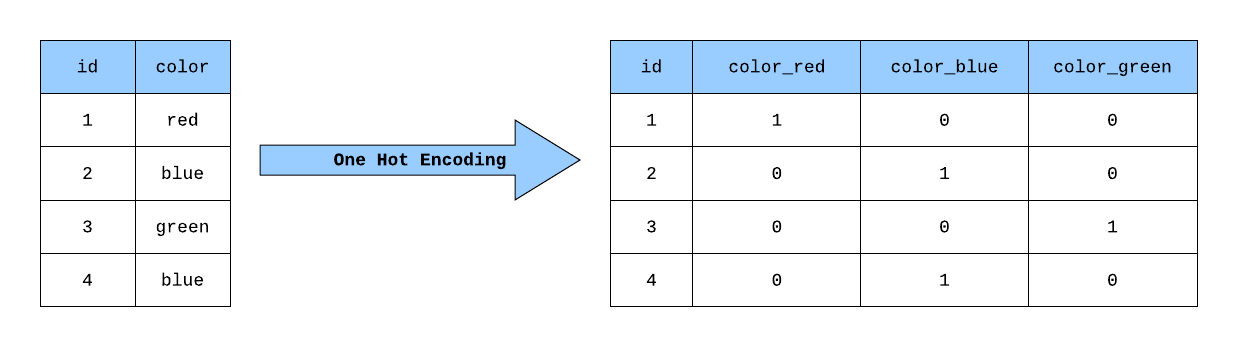

## **6.Write a program to implement Categorical Encoding, One-hot Encoding**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'S', 'M', 'L', 'M'],
    'Price': [10, 15, 10, 12, 10, 20, 18]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display original DataFrame
print("Original DataFrame:")
print(df)


Original DataFrame:
   Color Size  Price
0    Red    S     10
1   Blue    M     15
2  Green    L     10
3   Blue    S     12
4    Red    M     10
5  Green    L     20
6    Red    M     18


In [2]:

# Categorical Encoding
df['Color_Encoded'] = df['Color'].astype('category').cat.codes
df['Size_Encoded'] = df['Size'].astype('category').cat.codes

# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['Color', 'Size'], prefix=['Color', 'Size'])

# Display the DataFrames
print("\nDataFrame with Categorical Encoding:")
print(df[['Color', 'Size', 'Color_Encoded', 'Size_Encoded']])







DataFrame with Categorical Encoding:
   Color Size  Color_Encoded  Size_Encoded
0    Red    S              2             2
1   Blue    M              0             1
2  Green    L              1             0
3   Blue    S              0             2
4    Red    M              2             1
5  Green    L              1             0
6    Red    M              2             1


In [3]:
print("\nDataFrame with One-Hot Encoding:")
print(df_one_hot)


DataFrame with One-Hot Encoding:
   Price  Color_Encoded  Size_Encoded  Color_Blue  Color_Green  Color_Red  \
0     10              2             2       False        False       True   
1     15              0             1        True        False      False   
2     10              1             0       False         True      False   
3     12              0             2        True        False      False   
4     10              2             1       False        False       True   
5     20              1             0       False         True      False   
6     18              2             1       False        False       True   

   Size_L  Size_M  Size_S  
0   False   False    True  
1   False    True   False  
2    True   False   False  
3   False   False    True  
4   False    True   False  
5    True   False   False  
6   False    True   False  


In [4]:
# Set the style for better visualization
plt.style.use('seaborn-darkgrid')

# Plotting the original data
plt.figure(figsize=(12, 6))

# Plot Categorical Encoding
plt.subplot(1, 2, 1)
plt.scatter(df.index, df['Color_Encoded'], color='red', label='Color Encoded', alpha=0.6, s=100)
plt.scatter(df.index, df['Size_Encoded'] + 1, color='blue', label='Size Encoded', alpha=0.6, s=100)  # Offset Size
plt.title('Categorical Encoding')
plt.xlabel('Index')
plt.ylabel('Encoded Value')
plt.yticks(range(3), ['Red', 'Blue', 'Green'])
plt.legend()
plt.grid(True)

# Plot One-Hot Encoding
one_hot_sum = df_one_hot[['Color_Red', 'Color_Blue', 'Color_Green', 'Size_S', 'Size_M', 'Size_L']].sum()
plt.subplot(1, 2, 2)
one_hot_sum.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'cyan'], alpha=0.7)
plt.title('One-Hot Encoding')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show plots
plt.tight_layout()
plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)